In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_df=pd.DataFrame(iris.data)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_df.dtypes

0    float64
1    float64
2    float64
3    float64
dtype: object

In [9]:
iris_df.describe

<bound method NDFrame.describe of        0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]>

In [10]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
iris_df.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [12]:
X = iris_df.iloc[:,1:4]
y = iris.target   # y is the Labels in our dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(X_test) 
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score , ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.96


array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]], dtype=int64)

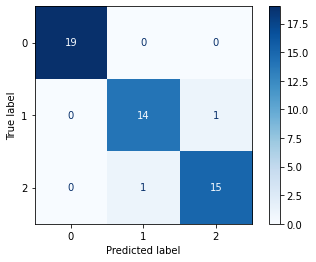

In [18]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


In [20]:
ac1 = accuracy_score(y_test, y_pred)*100
print('Accuracy Score:')
print(ac1)

Accuracy Score:
96.0


In [21]:
# for 0 
tp=cm[0][0]
fn=(cm[0][1])+(cm[0][2])
tn=(cm[1][1])+(cm[1][2])+(cm[2][1])+(cm[2][2])
fp=(cm[1][0])+(cm[2][0])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )
recall = tp/(tp+fn)
print('recall:',recall)
precision = tp/(tp+fp)
print('precision:',precision)
fmeasure = (2* recall*precision) / (recall+precision)
print('fmeasure:',fmeasure)

true positive:  19
false positive:  0
true negative:  31
false negative:  0
error rate: 0.0
recall: 1.0
precision: 1.0
fmeasure: 1.0


In [22]:
# for 1
tp=cm[1][1]
fn=(cm[1][0])+(cm[1][2])
tn=(cm[0][0])+(cm[0][2])+(cm[2][0])+(cm[2][2])
fp=(cm[0][1])+(cm[2][1])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )
recall = tp/(tp+fn)
print('recall:',recall)
precision = tp/(tp+fp)
print('precision:',precision)
fmeasure = (2* recall*precision) / (recall+precision)
print('fmeasure:',fmeasure)

true positive:  14
false positive:  1
true negative:  34
false negative:  1
error rate: 0.04
recall: 0.9333333333333333
precision: 0.9333333333333333
fmeasure: 0.9333333333333333


In [23]:
# for 2
tp=cm[2][2]
fn=(cm[2][0])+(cm[2][1])
tn=(cm[0][0])+(cm[0][1])+(cm[1][0])+(cm[1][1])
fp=(cm[0][2])+(cm[1][2])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )
recall = tp/(tp+fn)
print('recall:',recall)
precision = tp/(tp+fp)
print('precision:',precision)
fmeasure = (2* recall*precision) / (recall+precision)
print('fmeasure:',fmeasure)

true positive:  15
false positive:  1
true negative:  33
false negative:  1
error rate: 0.04
recall: 0.9375
precision: 0.9375
fmeasure: 0.9375


In [24]:
 from sklearn.metrics import classification_report
print('                        classification report:')
print('')
print(classification_report(y_test,y_pred))

                        classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

